In [1]:
from pyproj import Transformer
import pandas as pd
%config InlineBackend.figure_formats = ['svg']

In [2]:
df = pd.read_json('https://opendata.infrabel.be/api/explore/v2.1/catalog/datasets/operationele-punten-van-het-newterk/exports/json?lang=fr&timezone=Europe%2FBerlin')

In [3]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:31370", always_xy=True)

In [4]:
df['lat'] = df['geo_shape'].apply(lambda x: x['geometry']['coordinates'][1])
df['lng'] = df['geo_shape'].apply(lambda x: x['geometry']['coordinates'][0])
del df['geo_point_2d']
del df['geo_shape']

In [5]:
coords_L72 = transformer.transform(df['lng'], df['lat'])

In [6]:
df['x72'] = coords_L72[0]
df['y72'] = coords_L72[1]

<Axes: xlabel='x72', ylabel='y72'>

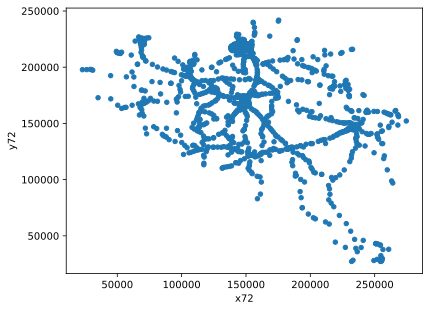

In [7]:
df.plot.scatter('x72', 'y72')